In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./results/mdi_local.two_subgroups_linear_sims/no_standardization/varying_heritability_n/seed331/results.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(20)

,rep,n,n_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,include_raw,model,fi,splitting_strategy,rocauc_group1_avg_metric,rocauc_group2_avg_metric,split_seed,index,var,local_fi_score_group1_mean,local_fi_score_group2_mean,true_support_group1,true_support_group2,cor_with_signal_group1,cor_with_signal_group2
0,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,0,0.150757,0.137608,1.0,0.0,NaN,0.420732
1,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,1,0.110371,0.104024,1.0,0.0,NaN,0.304871
2,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,2,0.187479,0.188632,1.0,0.0,NaN,0.216724
3,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,3,0.228179,0.239087,1.0,0.0,NaN,0.290071
4,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,4,0.086436,0.085397,1.0,0.0,NaN,0.280937
5,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,5,0.214153,0.212292,0.0,1.0,0.179038,NaN
6,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,6,0.248541,0.255527,0.0,1.0,0.259961,NaN
7,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,7,0.239040,0.231640,0.0,1.0,0.179454,NaN
8,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,8,0.282603,0.297536,0.0,1.0,0.331799,NaN
9,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,NaN,0.344267,0.7344,331,0,9,0.361036,0.397992,0.0,1.0,0.281864,NaN


In [4]:
# methods = ["MDI_all_stumps", "MDI_sub_stumps", "MDI_all_stumps_without_raw", "MDI_sub_stumps_without_raw", "LFI_sum_absolute_all_stumps",
#            "LFI_absolute_sum_all_stumps", "LFI_sum_absolute_sub_stumps", "LFI_absolute_sum_sub_stumps", 
#            "LFI_sum_absolute_all_stumps_without_raw", "LFI_absolute_sum_all_stumps_without_raw",
#            "LFI_sum_absolute_sub_stumps_without_raw", "LFI_absolute_sum_sub_stumps_without_raw", "TreeSHAP", "LIME"]

methods = ["LFI_sum_absolute", "LFI_absolute_sum", "LFI_sum_absolute_without_raw", "LFI_absolute_sum_without_raw",
           "TreeSHAP", "LIME"]
sample_row_n = df["n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
nreps = df["rep"].max()
results = {}
for r in range(nreps+1):
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["auroc_group1_avg_metric"] = []
            results[r][h][m]["auroc_group2_avg_metric"] = []
            # results[r][h][m]["auroc_group1_avg_prediction"] = []
            # results[r][h][m]["auroc_group2_avg_prediction"] = []

In [5]:
for r in range(nreps+1):
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group1_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_metric"].unique()) == 1
                # assert len(df_sub["rocauc_group1_avg_prediction"].unique()) == 1
                # assert len(df_sub["rocauc_group2_avg_prediction"].unique()) == 1
                results[r][h][m]["auroc_group1_avg_metric"].append(df_sub["rocauc_group1_avg_metric"].unique()[0])
                results[r][h][m]["auroc_group2_avg_metric"].append(df_sub["rocauc_group2_avg_metric"].unique()[0])
                # results[r][h][m]["auroc_group1_avg_prediction"].append(df_sub["rocauc_group1_avg_prediction"].unique()[0])
                # results[r][h][m]["auroc_group2_avg_prediction"].append(df_sub["rocauc_group2_avg_prediction"].unique()[0])

In [6]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["auroc_group1_avg_metric"] = []
        agg_results[h][m]["auroc_group2_avg_metric"] = []
        # agg_results[h][m]["auroc_group1_avg_prediction"] = []
        # agg_results[h][m]["auroc_group2_avg_prediction"] = []

In [7]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            agg_group1_avg_metric = 0
            agg_group2_avg_metric = 0
            # agg_group1_avg_prediction = 0
            # agg_group2_avg_prediction = 0
            for r in range(nreps+1):
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group1_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_metric"].unique()) == 1
                # assert len(df_sub["rocauc_group1_avg_prediction"].unique()) == 1
                # assert len(df_sub["rocauc_group2_avg_prediction"].unique()) == 1
                agg_group1_avg_metric += df_sub["rocauc_group1_avg_metric"].unique()[0]
                agg_group2_avg_metric += df_sub["rocauc_group2_avg_metric"].unique()[0]
                # agg_group1_avg_prediction += df_sub["rocauc_group1_avg_prediction"].unique()[0]
                # agg_group2_avg_prediction += df_sub["rocauc_group2_avg_prediction"].unique()[0]
            agg_group1_avg_metric /= (nreps+1)
            agg_group2_avg_metric /= (nreps+1)
            # agg_group1_avg_prediction /= (nreps+1)
            # agg_group2_avg_prediction /= (nreps+1)
            agg_results[h][m]["auroc_group1_avg_metric"].append(agg_group1_avg_metric)
            agg_results[h][m]["auroc_group2_avg_metric"].append(agg_group2_avg_metric)
            # agg_results[h][m]["auroc_group1_avg_prediction"].append(agg_group1_avg_prediction)
            # agg_results[h][m]["auroc_group2_avg_prediction"].append(agg_group2_avg_prediction)

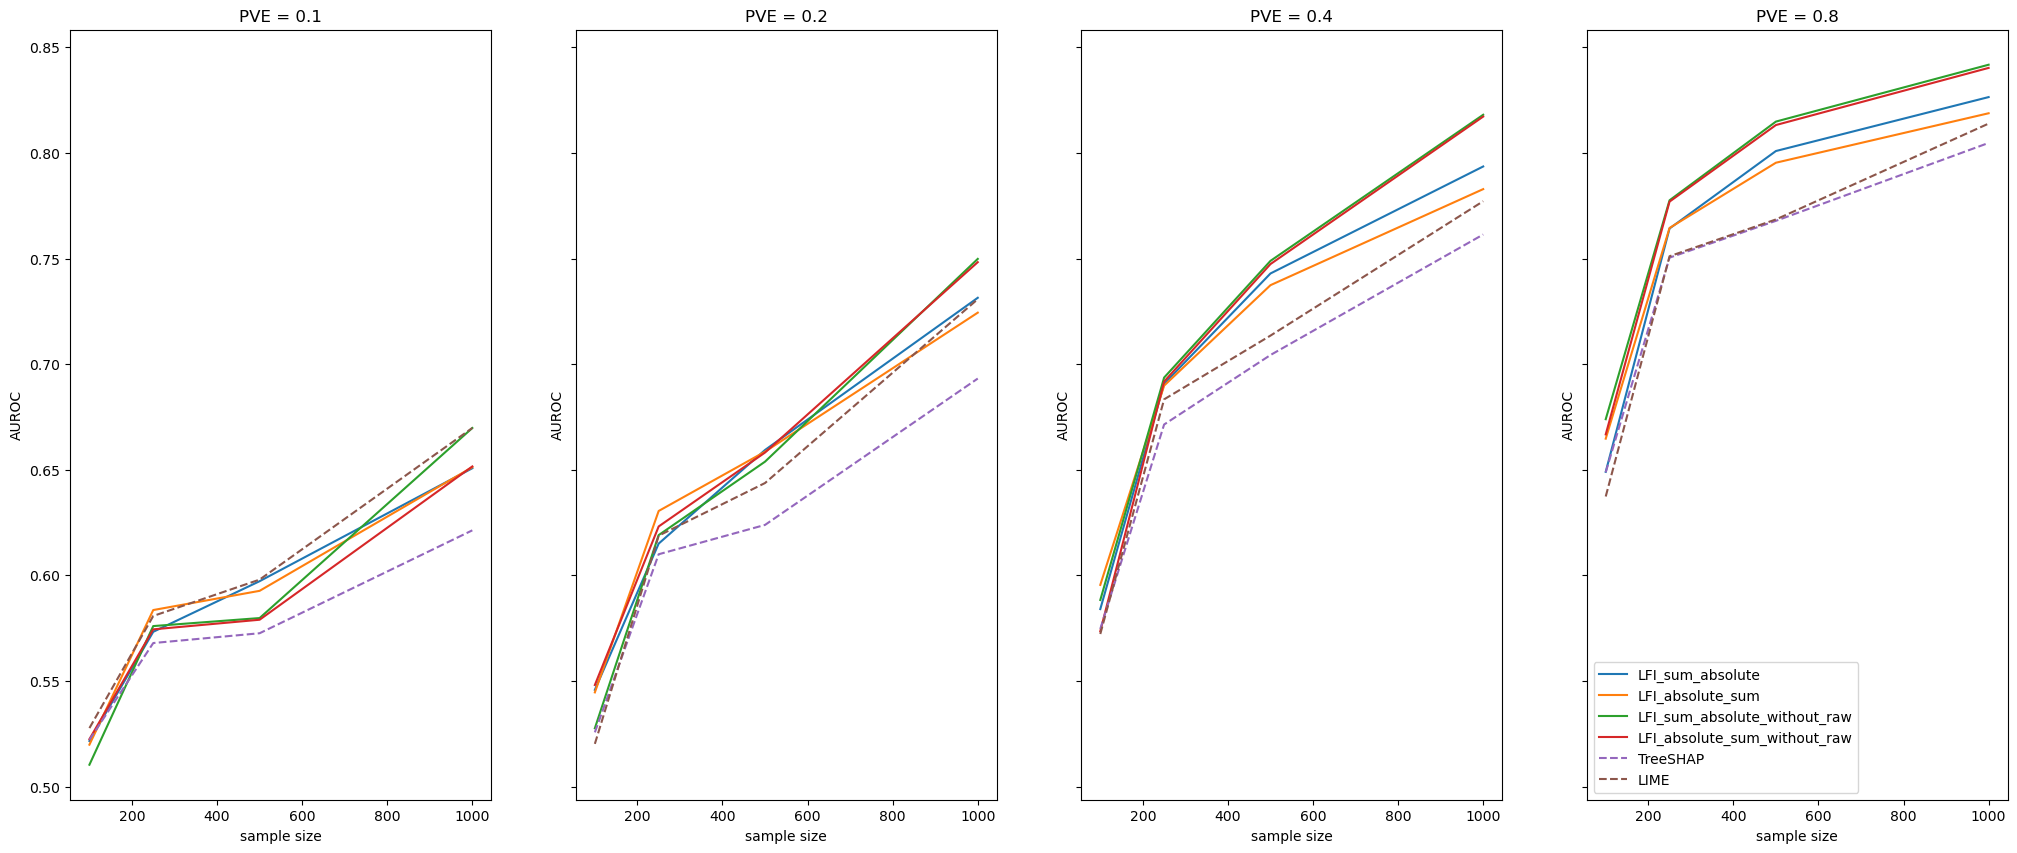

In [8]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if m in ["TreeSHAP", "LIME"]:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_metric"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_metric"], label=m)
    axs[i].set_xlabel('sample size')
    axs[i].set_ylabel('AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()

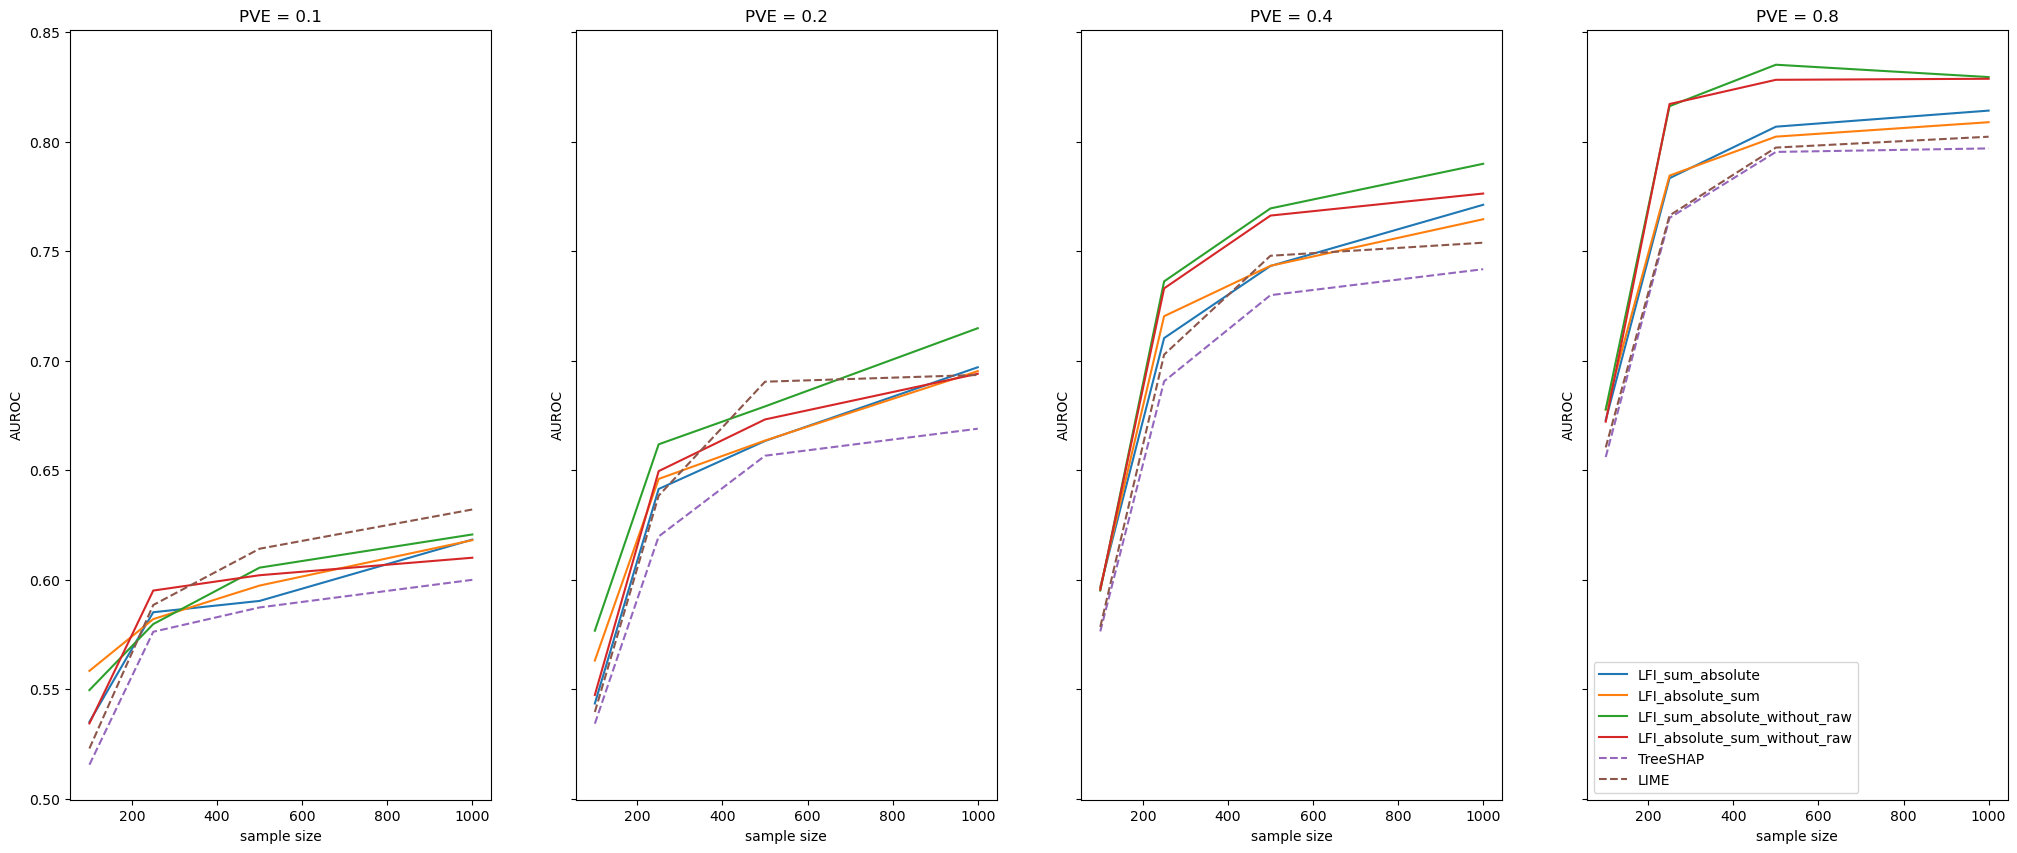

In [9]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)



for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if m in ["TreeSHAP", "LIME"]:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_metric"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_metric"], label=m)
    axs[i].set_xlabel('sample size')
    axs[i].set_ylabel('AUROC')
    axs[i].set_title('PVE = ' + str(h))
    


# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()

In [22]:
# load in pickle file to dataframe
absolute_sum = pd.read_pickle("./results/mdi_local.two_subgroups_linear_sims/no_standardization/varying_heritability_n/seed331/0.8_1000/rep3/RF_LFI_sum_absolute_without_raw_feature_importance.pkl")


In [23]:
from sklearn.metrics import roc_auc_score

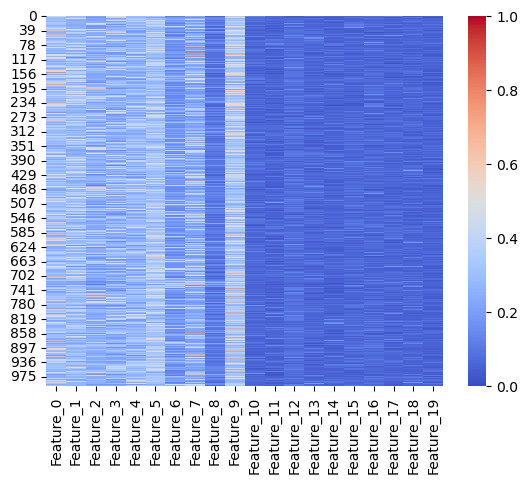

In [24]:
import seaborn as sns
# plot the heatmap of df
sns.heatmap(absolute_sum, cmap='coolwarm', vmin=0, vmax=1)
plt.show()

In [25]:
# plot heatmap of df.to_numpy()
results = absolute_sum.to_numpy()
sum = 0
for i in range(len(results)//2):
    result = results[i]
    support = np.concatenate((np.ones(5),np.zeros(15)))
    sum += roc_auc_score(support, result)
print(sum/(len(results)//2))

0.8731200000000012


In [26]:
sum = 0
for i in range(len(results)//2):
    result = results[i]
    support = np.concatenate((np.zeros(5),np.ones(5),np.zeros(10)))
    sum += roc_auc_score(support, result)
print(sum/(len(results)//2))

0.7712266666666673


In [27]:
sum = 0
for i in range(len(results)//2):
    result = results[i][:10]
    support = np.concatenate((np.ones(5),np.zeros(5)))
    sum += roc_auc_score(support, result)
print(sum/(len(results)//2))

0.6197600000000005


In [28]:
treeshap = pd.read_pickle("./results/mdi_local.two_subgroups_linear_sims/no_standardization/varying_heritability_n/seed331/0.8_1000/rep2/RF_TreeSHAP_feature_importance.pkl")

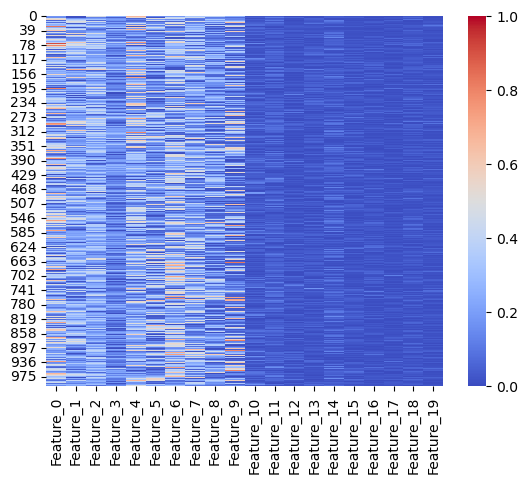

In [29]:
sns.heatmap(treeshap, cmap='coolwarm', vmin=0, vmax=1)
plt.show()

In [30]:
results = treeshap.to_numpy()
sum = 0
for i in range(len(results)//2):
    result = results[i][:10]
    support = np.concatenate((np.ones(5),np.zeros(5)))
    sum += roc_auc_score(support, result)
print(sum/(len(results)//2))

0.5724


In [31]:
sum = 0
for i in range(len(results)//2):
    result = results[i]
    support = np.concatenate((np.ones(5),np.zeros(15)))
    sum += roc_auc_score(support, result)
print(sum/(len(results)//2))

0.8277600000000003


In [32]:
# # Create subplots
# fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)


# for i in range(len(heritability)):
#     h = heritability[i]
#     for m in methods:
#         axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_prediction"], label=m)
#     axs[i].set_xlabel('sample size')
#     axs[i].set_ylabel('AUROC')
#     axs[i].set_title('PVE = ' + str(h))
    
# # Share the label in the last plot
# axs[2].legend()

# # Show the plots
# plt.show()

In [33]:
# # Create subplots
# fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)


# for i in range(len(heritability)):
#     h = heritability[i]
#     for m in methods:
#         axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_prediction"], label=m)
#     axs[i].set_xlabel('sample size')
#     axs[i].set_ylabel('AUROC')
#     axs[i].set_title('PVE = ' + str(h))

# # Share the label in the last plot
# axs[2].legend()

# # Show the plots
# plt.show()